<a href="https://colab.research.google.com/github/AshishKempwad/Convolutional-Neural-Networks-Latex-Report/blob/master/T%26J.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
from google.colab.patches import cv2_imshow
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [0]:
# importing the libraries
import pandas as pd
import numpy as np

# for reading and displaying images
from skimage.io import imread
import matplotlib.pyplot as plt
%matplotlib inline

# for creating validation set
from sklearn.model_selection import train_test_split



In [3]:
# loading dataset
train_csv = pd.read_csv('/content/drive/My Drive/2/train.csv')
test_csv = pd.read_csv('/content/drive/My Drive/2/test.csv')
sample_submission = pd.read_csv('/content/drive/My Drive/2/sample_sub.csv')

train_csv.head()


,image_file,emotion
0,IMG_10000000fn,1
1,IMG_10000000n,1
2,IMG_10000004f,0
3,IMG_10000004fn,0
4,IMG_10000004n,0


In [4]:
test_csv.head()

,image_file
0,IMG_10000000f
1,IMG_10000013f
2,IMG_10000018f
3,IMG_10000030f
4,IMG_10000032f


In [5]:
train_emotions=train_csv['emotion']
train_emotions.head()

0    1
1    1
2    0
3    0
4    0
Name: emotion, dtype: int64

In [0]:
import cv2
image = cv2.imread('/content/drive/My Drive/2/train_images/ntrain/IMG_10000000fn.jpg')
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
res = cv2.resize(gray, dsize=(640,360))

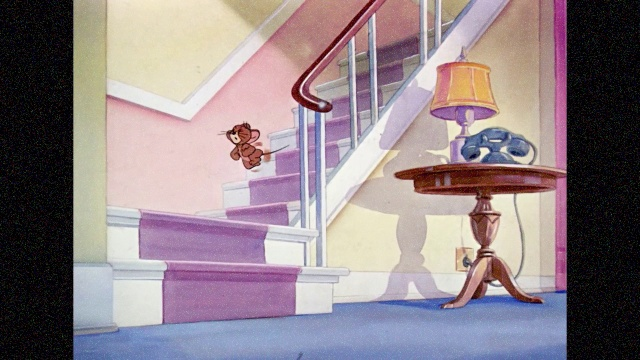

In [7]:

cv2_imshow(image)

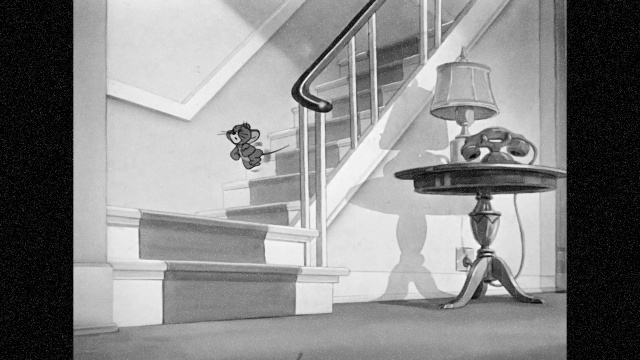

In [8]:
cv2_imshow(res)

In [9]:
res.shape

(360, 640)

In [10]:
import imageio
firstImg = imageio.imread('/content/drive/My Drive/2/train_images/ntrain/IMG_10000000fn.jpg')
print(type(firstImg))

<class 'imageio.core.util.Array'>


In [0]:

gray_resize = []
img_names=list(train_csv['image_file'])
for i in range(len(img_names)):
  img= '/content/drive/My Drive/2/train_images/ntrain/' + img_names[i] + '.jpg'
  image=cv2.imread(img)
  gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
  res = cv2.resize(gray, dsize=(640,360))
  gray_resize.append(res)
  

  



In [12]:
gray_resize[0].shape

(360, 640)

In [14]:
gray_resize=np.array(gray_resize)
gray_resize.shape

(1941, 360, 640)

In [0]:
train_label = train_csv['emotion']

In [16]:
train_label.head()

0    1
1    1
2    0
3    0
4    0
Name: emotion, dtype: int64

In [0]:
gray_resize = np.array(gray_resize)/255

In [0]:
# X_train, X_val, Y_train, Y_val = train_test_split(gray_resize, train_label, test_size = 0.1)


In [17]:
# X_train=np.array(X_train)
# X_val = np.array(X_val)
# Y_train=np.array(Y_train)
# Y_val=np.array(Y_val)
# print(X_train.shape)
# print(X_val.shape)
# print(Y_train.shape)
# print(Y_val.shape)

(1746, 360, 640)
(195, 360, 640)
(1746,)
(195,)


In [18]:
from keras import layers
from keras import models

Using TensorFlow backend.


In [0]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Activation, Flatten
from tensorflow.keras.layers import Conv2D, MaxPooling2D

In [0]:
from keras.utils import to_categorical
reshaped_train_images=gray_resize.reshape((1941,360,640,1))
cat_labels=to_categorical(train_label,5)
# reshaped_train_images = reshaped_train_images/255.0

In [0]:
from keras.layers.normalization import BatchNormalization
model=Sequential()
model.add(Conv2D(32, (3,3), input_shape=(360,640,1)))
model.add(Activation('relu'))
BatchNormalization(axis=-1)
model.add(Conv2D(32, (3,3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2,2)))

BatchNormalization(axis=-1)
model.add(Conv2D(64, (3,3)))
model.add(Activation('relu'))
BatchNormalization(axis=-1)
model.add(Conv2D(64, (3,3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Flatten())  # this converts our 3D feature maps to 1D feature vectors

In [22]:
BatchNormalization()
model.add(Dense(512))
model.add(Activation('relu'))
BatchNormalization()
model.add(Dropout(0.2))
model.add(Dense(5))
model.add(Activation('softmax'))
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 358, 638, 32)      320       
_________________________________________________________________
activation (Activation)      (None, 358, 638, 32)      0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 356, 636, 32)      9248      
_________________________________________________________________
activation_1 (Activation)    (None, 356, 636, 32)      0         
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 178, 318, 32)      0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 176, 316, 64)      18496     
_________________________________________________________________
activation_2 (Activation)    (None, 176, 316, 64)      0

In [23]:
model.compile(loss='categorical_crossentropy', optimizer='Adam', metrics=['accuracy'])

model.fit(reshaped_train_images,cat_labels,batch_size=16,epochs=10)

Epoch 1/10
122/122 [==============================] - 1189s 10s/step - loss: 1.7067 - accuracy: 0.3452
Epoch 2/10
122/122 [==============================] - 1187s 10s/step - loss: 1.1746 - accuracy: 0.5930
Epoch 3/10
122/122 [==============================] - 1176s 10s/step - loss: 0.5100 - accuracy: 0.8604
Epoch 4/10
122/122 [==============================] - 1175s 10s/step - loss: 0.2297 - accuracy: 0.9449
Epoch 5/10
122/122 [==============================] - 1175s 10s/step - loss: 0.1303 - accuracy: 0.9727
Epoch 6/10
122/122 [==============================] - 1177s 10s/step - loss: 0.1109 - accuracy: 0.9835
Epoch 7/10
122/122 [==============================] - 1177s 10s/step - loss: 0.0575 - accuracy: 0.9882
Epoch 8/10
122/122 [==============================] - 1175s 10s/step - loss: 0.0466 - accuracy: 0.9928
Epoch 9/10
122/122 [==============================] - 1180s 10s/step - loss: 0.0336 - accuracy: 0.9943
Epoch 10/10
122/122 [==============================] - 1178s 10s/step - l

In [0]:
test_image = []
img_names=list(test_csv['image_file'])
for i in range(len(img_names)):
  img= '/content/drive/My Drive/2/test_images/ntest/' + img_names[i] + '.jpg'
  image=cv2.imread(img)
  gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
  res = cv2.resize(gray, dsize=(640,360))
  test_image.append(res)
  

In [30]:
test_image=np.array(test_image)
test_image.shape

(275, 360, 640)

In [0]:
test_image=test_image.reshape((275,360,640,1))

In [0]:
results=model.predict(test_image)

In [39]:
results

array([[0., 1., 0., 0., 0.],
       [0., 0., 0., 1., 0.],
       [0., 1., 0., 0., 0.],
       ...,
       [0., 0., 1., 0., 0.],
       [0., 0., 1., 0., 0.],
       [0., 0., 1., 0., 0.]], dtype=float32)

In [0]:
results = np.argmax(results,axis = 1)

In [0]:
submission = pd.DataFrame({'emotion':results})

In [0]:
file_name = 'submission.csv'
submission.to_csv(file_name,index=False)

In [45]:
submission

,emotion
0,1
1,3
2,1
3,1
4,1
...,...
270,1
271,1
272,2
273,2
